In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/vaishakmurali1997/spaceship-titanic/main/train.csv')

In [ ]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Do something ..


In [ ]:
data.keys()

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
data['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [ ]:
data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
data['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

<Axes: >

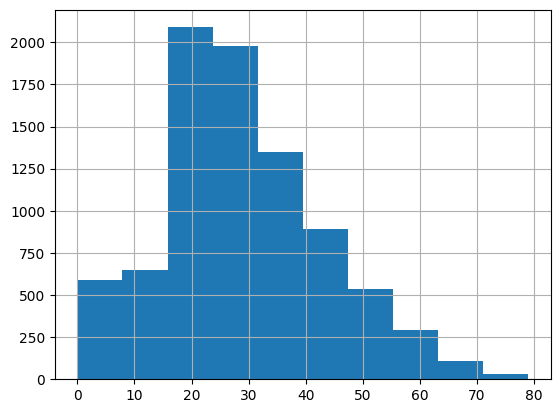

In [ ]:
data['Age'].hist()

In [ ]:
X_train = data.copy()

# Data Exploration

We can see that 49.6% of the passengers have not been transported.

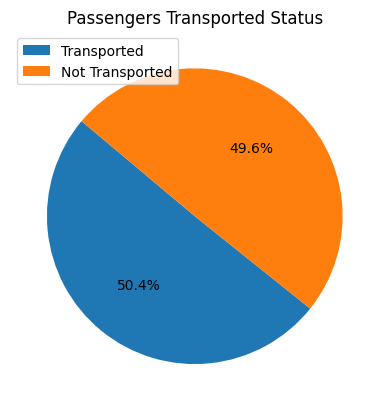

In [ ]:
plt.pie(X_train['Transported'].value_counts(), autopct='%1.1f%%', startangle=140)
plt.title('Passengers Transported Status')
plt.legend(labels=['Transported', 'Not Transported'])

In [ ]:
def barPlots(value, value2, transported=False):
  count = X_train.groupby([value, value2]).size().unstack(fill_value=0)
  # Plot the histogram
  count.plot(kind='bar', stacked=False, figsize=(6, 6))

  # Add labels and title
  plt.xlabel(value)
  plt.ylabel(f'Number of {value} Passengers')
  plt.title(f'Histogram of {value} by {value2} Status')

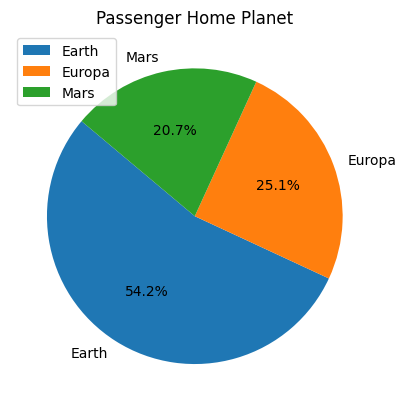

In [ ]:
plt.pie(X_train['HomePlanet'].value_counts(), labels=['Earth', 'Europa', 'Mars'], autopct='%1.1f%%', startangle=140)
plt.title('Passenger Home Planet')
plt.legend(labels=['Earth', 'Europa', 'Mars'])

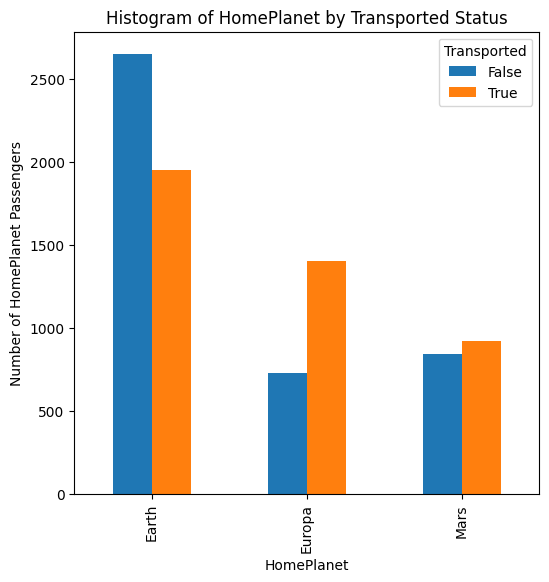

In [ ]:
barPlots('HomePlanet', 'Transported')

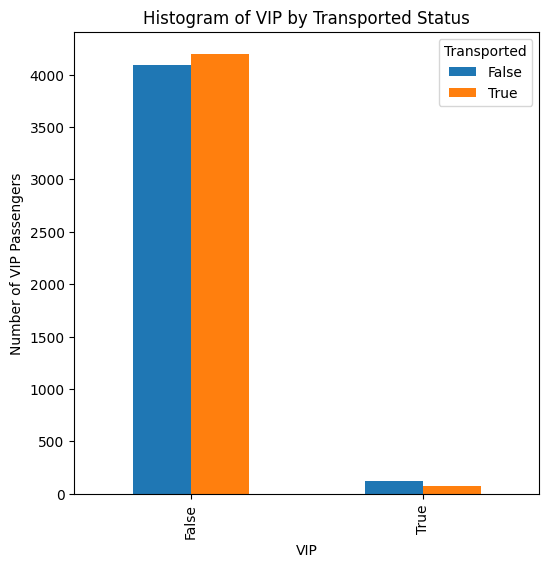

In [ ]:
barPlots('VIP', 'Transported')

Most of the passengers were not VIPs. Also Most of the VIP Passengers were not transported.

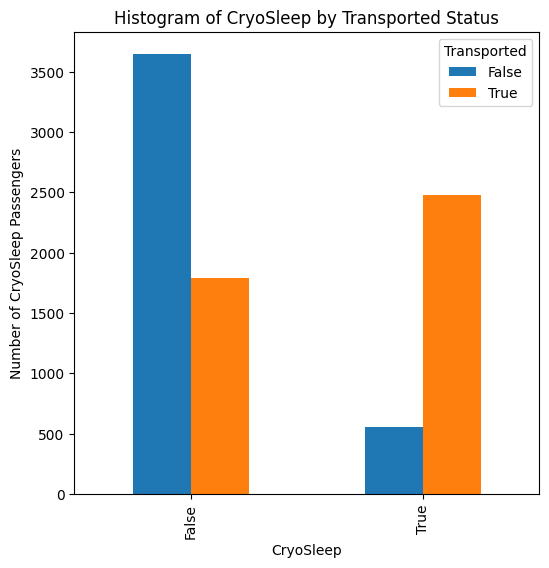

In [ ]:
barPlots('CryoSleep', 'Transported')

Most of passengers who opted for CryoSleep were transported.

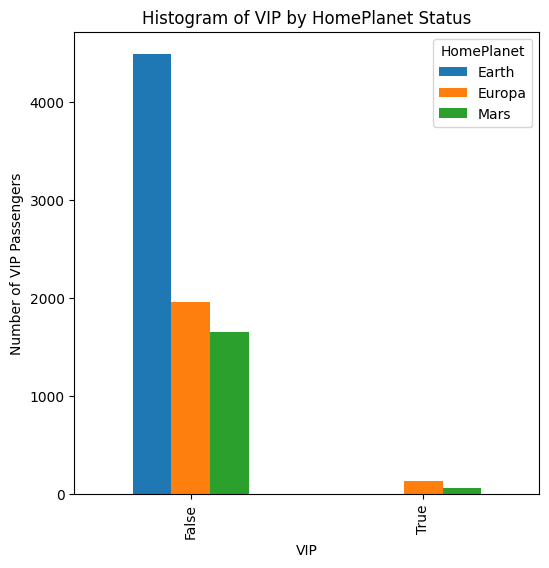

In [ ]:
barPlots('VIP', 'HomePlanet')

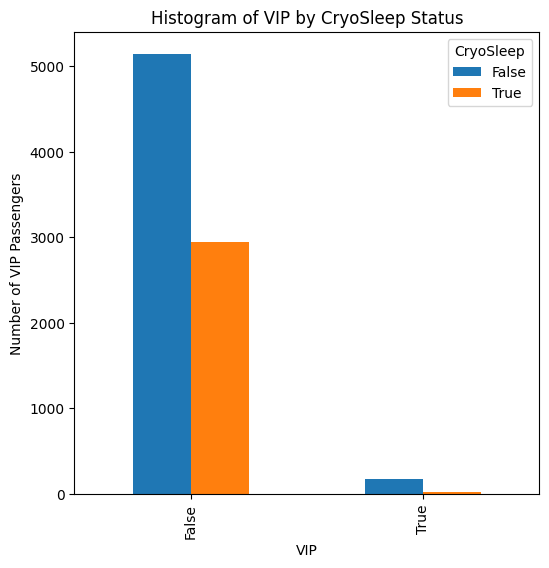

In [ ]:
barPlots('VIP', 'CryoSleep')

In [ ]:
X_train['age_bins'] = pd.cut(x=X_train['Age'], bins=[10, 20, 40, 60, 80, 100])

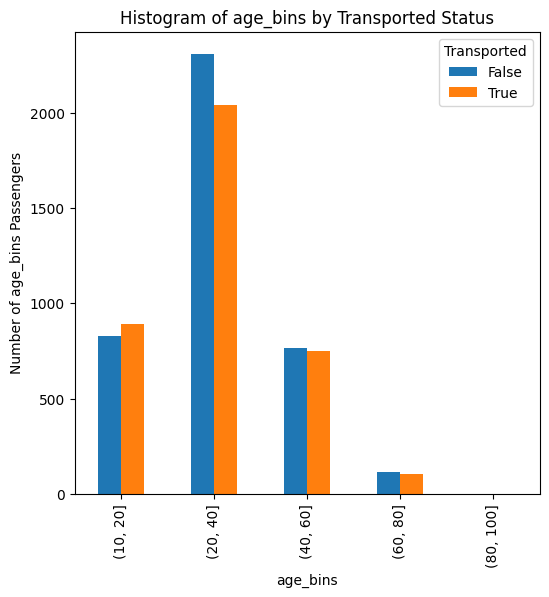

In [ ]:
barPlots('age_bins', 'Transported')

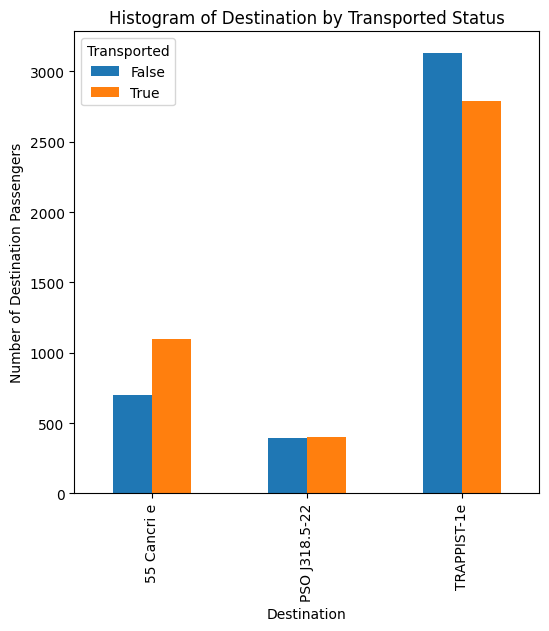

In [ ]:
barPlots('Destination', 'Transported')

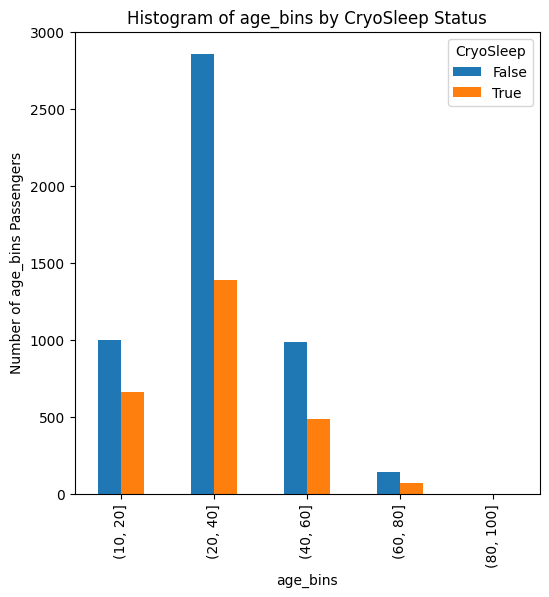

In [ ]:
barPlots('age_bins', 'CryoSleep')

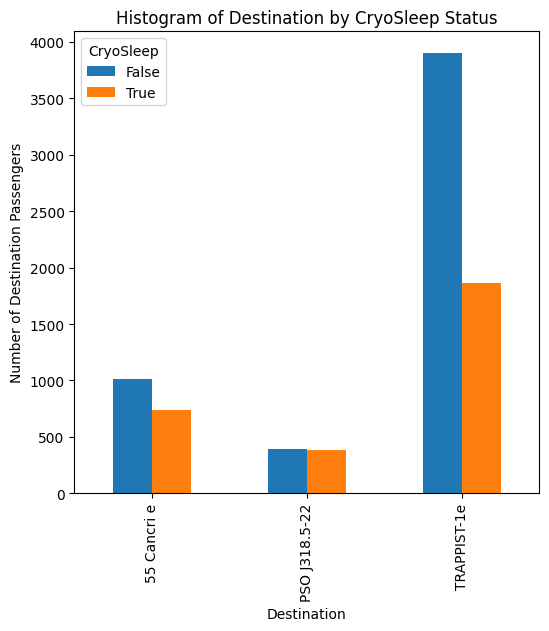

In [ ]:
barPlots('Destination', 'CryoSleep')

# Data Cleaning & Feature Engineering

In [ ]:
data = X_train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Transported'], axis=1), data['Transported'],
    test_size=0.3, random_state=42)

In [ ]:
# Droping unwanted features
X_train = X_train.drop(['Name', 'RoomService', 'FoodCourt', 'ShoppingMall', 'age_bins', 'Spa', 'VRDeck'], axis=1)
# X_train = X_train.drop([ 'Name', 'age_bins'], axis=1)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class CabinSplitTransform(BaseEstimator, TransformerMixin):
  def __init__(self):
    pass
  def fit(self, X, y = None):
    return self

  def transform(self, X):

    # Passenger split according to groups
    X[["PassengerId_1", "PassengerId_2"]] = X["PassengerId"].str.split("_", expand=True)
    X[["PassengerId_1", "PassengerId_2"]] = X[["PassengerId_1", "PassengerId_2"]].astype(int)

    # Cabin split to Deck Number & Side
    splitedCabin = X['Cabin'].str.split('/', expand=True)
    splitedCabin.columns = ['Deck', 'Num', 'Side']
    X = X.drop(['Cabin'], axis=1)
    return pd.concat([X, splitedCabin], axis=1)


In [ ]:
testing_transformer = CabinSplitTransform()
run_test = testing_transformer.fit_transform(X_train)
run_test

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,PassengerId_1,PassengerId_2,Deck,Num,Side
3032,3282_03,Europa,False,TRAPPIST-1e,43.0,False,3282,3,B,120,S
7757,8276_02,Europa,True,TRAPPIST-1e,23.0,False,8276,2,C,273,P
1795,1911_01,Earth,False,TRAPPIST-1e,46.0,False,1911,1,G,300,S
1702,1808_01,Earth,False,TRAPPIST-1e,33.0,False,1808,1,F,346,S
6634,6995_01,Earth,False,55 Cancri e,24.0,False,6995,1,F,1334,S
...,...,...,...,...,...,...,...,...,...,...,...
5734,6076_01,Earth,NaN,TRAPPIST-1e,18.0,False,6076,1,G,988,S
5191,5537_01,Mars,False,TRAPPIST-1e,50.0,NaN,5537,1,F,1063,S
5390,5756_06,Earth,False,PSO J318.5-22,22.0,False,5756,6,F,1194,P
860,0925_01,Mars,False,TRAPPIST-1e,34.0,False,925,1,F,191,P


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
categorical_attributes = ['PassengerId','Cabin', "HomePlanet", 'CryoSleep', 'Destination', 'VIP']
numerical_attributes = ["Age"]

categorical_pipeline = Pipeline([
    ("split-cabins", CabinSplitTransform()),
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("one-hot-encode", OneHotEncoder()),
])

numerical_pipeline = Pipeline([
    ("age-imputer", SimpleImputer(strategy='mean'))
])

preprocessing_pipeline = ColumnTransformer([
    ("categorical_pipeline", categorical_pipeline, categorical_attributes),
    ("numerical_pipeline", numerical_pipeline, numerical_attributes)
])


In [ ]:
X_train_prepared = preprocessing_pipeline.fit_transform(X_train)

# Model Training
1. Logistic Regression
2. Random Forest Classifier
3. KNN Classifier
4. SVC
5. Cat Boost *Classifier*

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(solver='liblinear')
logistic_reg.fit(X_train_prepared, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(logistic_reg, X_train_prepared, y_train, cv=3, scoring="accuracy")

array([0.70478068, 0.7204142 , 0.72435897])

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(logistic_reg, X_train_prepared, y_train, cv=3,)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[2366,  660],
       [1065, 1994]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train, y_pred)

0.7513187641296156

In [ ]:
recall_score(y_train, y_pred)

0.6518470088264139

In [ ]:
f1_score(y_train, y_pred)

0.6980570628391388

In [ ]:
y_scores = cross_val_predict(logistic_reg, X_train_prepared, y_train, cv=3, method="decision_function")
print(y_scores)

[ 1.04114124  2.46513073 -1.57328737 ... -1.58643683 -0.68336874
  0.17328162]


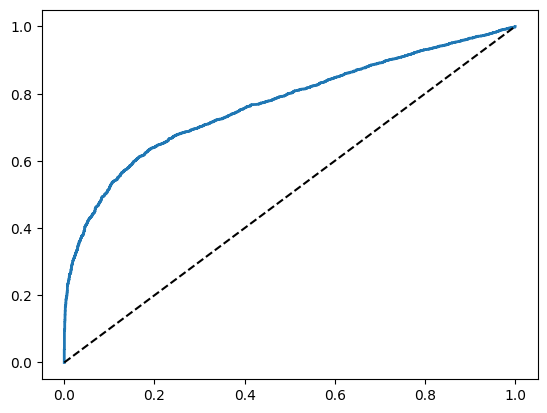

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_train, y_scores)
plt.plot(fpr, tpr, linewidth=2 )
plt.plot([0,1], [0,1], 'k--')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
cross_val_score(forest_clf, X_train_prepared, y_train, cv=3, scoring="accuracy")

array([0.73139478, 0.74408284, 0.74161736])

In [ ]:
y_probas_forest = cross_val_predict(forest_clf, X_train_prepared, y_train, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

In [ ]:
def plot_roc_auc (fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2 ,label=label)
  plt.plot([0,1], [0,1], 'k--')
  plt.legend(loc="lower right")
  plt.show()

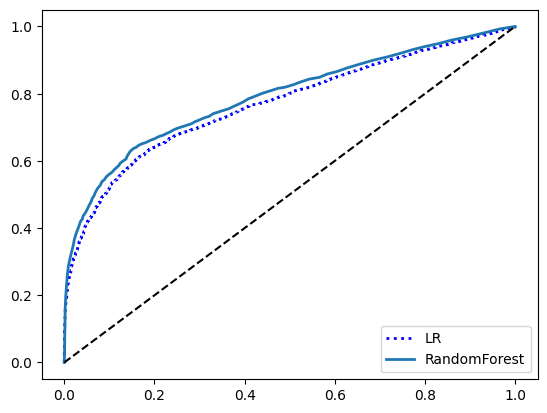

In [ ]:
plt.plot(fpr, tpr, 'b:', linewidth=2,  label="LR")
plot_roc_auc(fpr_forest, tpr_forest,"RandomForest")

# SVC

In [ ]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train_prepared, y_train)
cross_val_score(model_svc, X_train_prepared, y_train, cv=3, scoring="accuracy")

array([0.72646624, 0.72879684, 0.7352071 ])

In [ ]:
y_pred = cross_val_predict(model_svc, X_train_prepared, y_train, cv=3,)

In [ ]:
f1_score(y_train, y_pred)

0.6942271880819367

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train_prepared, y_train)
cross_val_score(knc, X_train_prepared, y_train, cv=3, scoring="accuracy")

array([0.68851651, 0.68934911, 0.69822485])

# Cat Boost

In [ ]:
!pip3 install catboost
from catboost import CatBoostClassifier

In [ ]:
cat_boost_model = CatBoostClassifier(verbose=False)
cat_boost_model.fit(X_train_prepared, y_train)
cross_val_score(cat_boost_model, X_train_prepared, y_train, cv=3, scoring="accuracy")

In [ ]:
y_pred = cross_val_predict(cat_boost_model, X_train_prepared, y_train, cv=3,)
f1_score(y_train, y_pred)

0.7142085359265262

In [ ]:
confusion_matrix(y_train, y_pred)

array([[2515,  511],
       [1076, 1983]])

In [ ]:
X_test_prepared = preprocessing_pipeline.fit_transform(X_test)
y_pred = cross_val_predict(cat_boost_model, X_train_prepared, y_train, cv=3,)
f1_score(y_train, y_pred)

0.7142085359265262